# Fit smooth curve to describe measured P1D in simulations

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import p1d_arxiv

In [2]:
arxiv=p1d_arxiv.ArxivP1D(verbose=True,skewers_label='Ns50_wM0.1')

latin hyper-cube data {'param_space': {'Om_star': {'ip': 0, 'min_val': 0.955, 'max_val': 0.975, 'z_star': 3.0, 'latex': '$\\Omega_\\star$'}, 'Delta2_star': {'ip': 1, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'mu_He': {'ip': 2, 'min_val': 0.5, 'max_val': 2.0, 'latex': '$\\mu_{\\rm He}$'}}, 'nsamples': 5, 'samples': {'0': [0.961, 0.39, 1.25], '1': [0.965, 0.31, 0.9500000000000001], '2': [0.969, 0.35, 1.55], '3': [0.973, 0.27, 0.65], '4': [0.957, 0.43000000000000005, 1.85]}}
simulation suite has 5 samples
0 sample has sim params = [0.961, 0.39, 1.25]
simulation has 7 redshifts
../mini_sim_suite//sim_pair_0/sim_plus/p1d_0_Ns50_wM0.1.json snapshot does not have p1d
1 sample has sim params = [0.965, 0.31, 0.9500000000000001]
simulation has 7 redshifts
../mini_sim_suite//sim_pair_1/sim_plus/p1d_0_Ns50_wM0.1.json snapshot does not have p1d
2 sample has sim params = [0.969, 0.35, 1.55]
simulation has 7 redshifts
../mini_sim_suite//sim_pair_2

In [3]:
k_Mpc=arxiv.data[0]['k_Mpc']
p1d_Mpc=arxiv.data[0]['p1d_Mpc']

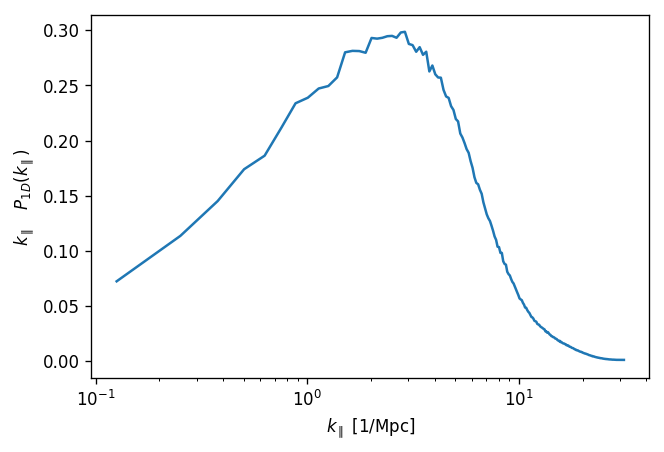

In [4]:
plt.semilogx(k_Mpc,k_Mpc*p1d_Mpc)
plt.xlabel(r'$k_\parallel$ [1/Mpc]')
plt.ylabel(r'$k_\parallel \quad P_{1D}(k_\parallel)$')

## Try fitting k * P1D(k) with a polynomial in log(k)

In [5]:
kmax_fit=5.0
mask=(k_Mpc<kmax_fit) & (k_Mpc > 0.0)
fit_p1d = np.polyfit(np.log(k_Mpc[mask]),k_Mpc[mask]*p1d_Mpc[mask], 4)
smooth_p1d = np.poly1d(fit_p1d)

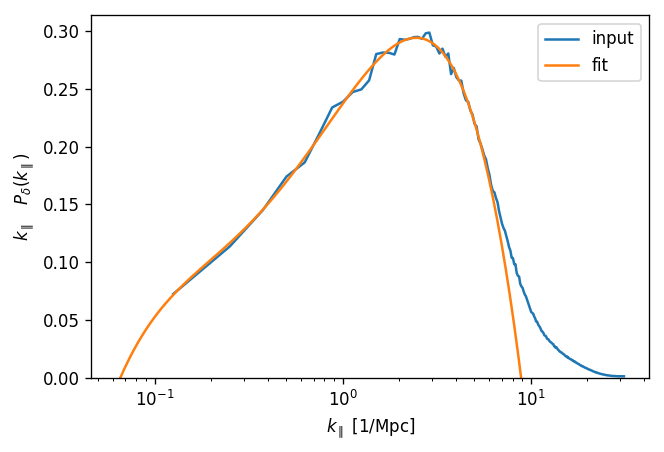

In [6]:
k_fine=np.logspace(np.log10(0.5*k_Mpc[1]),np.log10(2*kmax_fit),100)
plt.semilogx(k_Mpc,k_Mpc*p1d_Mpc,label='input')
plt.semilogx(k_fine,smooth_p1d(np.log(k_fine)),label='fit')
plt.legend()
ymax=1.05*max(k_Mpc*p1d_Mpc)
plt.ylim([0.0,ymax])
plt.xlabel(r'$k_\parallel$ [1/Mpc]')
plt.ylabel(r'$k_\parallel \quad P_{\delta}(k_\parallel)$')

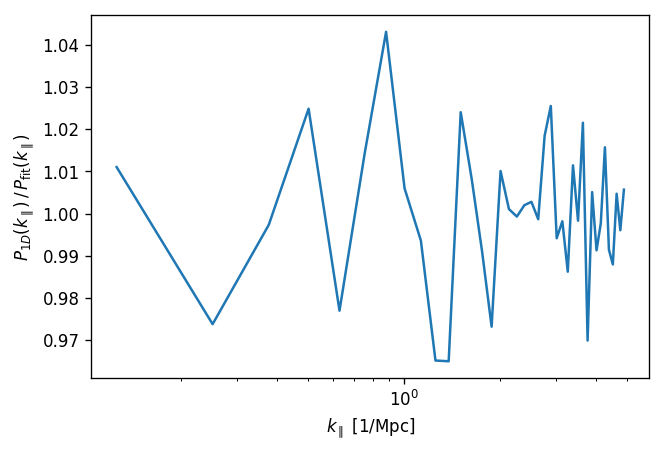

In [7]:
plt.semilogx(k_Mpc[mask],k_Mpc[mask]*p1d_Mpc[mask]/smooth_p1d(np.log(k_Mpc[mask])))
#ymax=1.05*max(k_Mpc*p1d_Mpc)
#plt.ylim([0.0,ymax])
plt.xlabel(r'$k_\parallel$ [1/Mpc]')
plt.ylabel(r'$P_{1D}(k_\parallel) \, / \, P_{\rm fit}(k_\parallel)$')

## Now try fitting log(P1D) with a polynomial in log(k)

In [8]:
kmax_fit=10.0
mask=(k_Mpc<kmax_fit) & (k_Mpc > 0.0)
fit_p1d = np.polyfit(np.log(k_Mpc[mask]),np.log(p1d_Mpc[mask]), 4)
smooth_p1d = np.poly1d(fit_p1d)

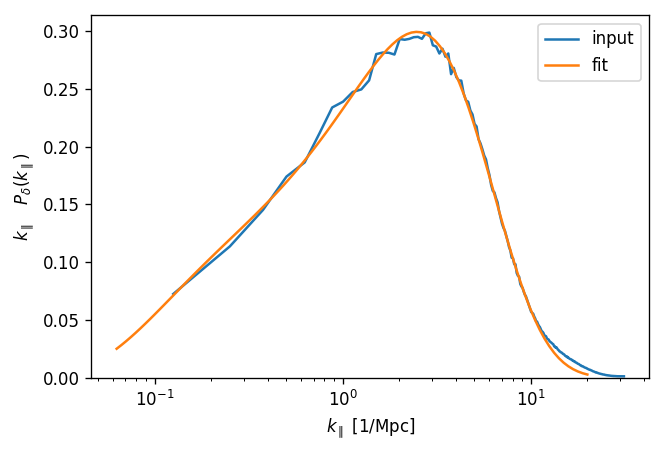

In [9]:
k_fine=np.logspace(np.log10(0.5*k_Mpc[1]),np.log10(2*kmax_fit),100)
plt.semilogx(k_Mpc,k_Mpc*p1d_Mpc,label='input')
plt.semilogx(k_fine,k_fine*np.exp(smooth_p1d(np.log(k_fine))),label='fit')
plt.legend()
ymax=1.05*max(k_Mpc*p1d_Mpc)
plt.ylim([0.0,ymax])
plt.xlabel(r'$k_\parallel$ [1/Mpc]')
plt.ylabel(r'$k_\parallel \quad P_{\delta}(k_\parallel)$')

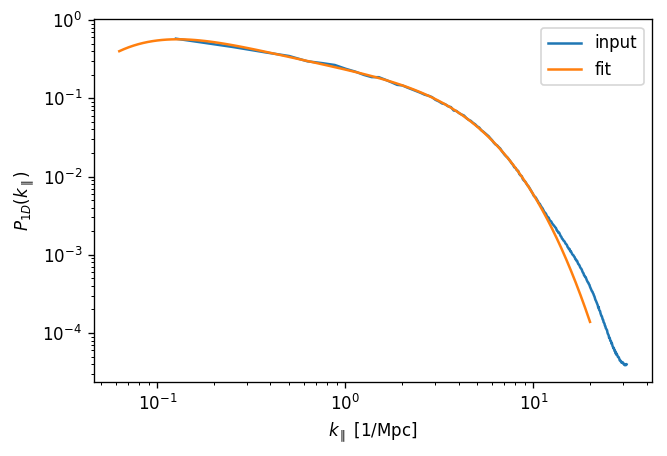

In [10]:
k_fine=np.logspace(np.log10(0.5*k_Mpc[1]),np.log10(2*kmax_fit),100)
plt.loglog(k_Mpc,p1d_Mpc,label='input')
plt.loglog(k_fine,np.exp(smooth_p1d(np.log(k_fine))),label='fit')
plt.legend()
plt.xlabel(r'$k_\parallel$ [1/Mpc]')
plt.ylabel(r'$P_{1D}(k_\parallel)$')

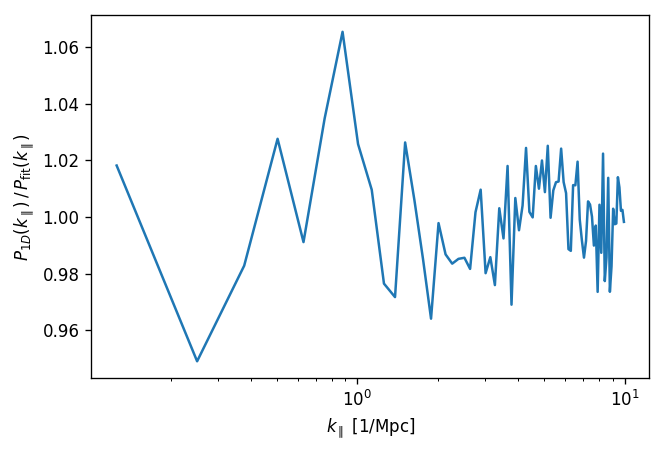

In [11]:
plt.semilogx(k_Mpc[mask],p1d_Mpc[mask]/np.exp(smooth_p1d(np.log(k_Mpc[mask]))))
#ymax=1.05*max(k_Mpc*p1d_Mpc)
#plt.ylim([0.0,ymax])
plt.xlabel(r'$k_\parallel$ [1/Mpc]')
plt.ylabel(r'$P_{1D}(k_\parallel) \, / \, P_{\rm fit}(k_\parallel)$')

### Use object in poly_p1d

In [12]:
import poly_p1d

In [13]:
smooth_p1d = poly_p1d.PolyP1D(k_Mpc,p1d_Mpc,kmin_Mpc=1.e-3,kmax_Mpc=10.0,deg=4)

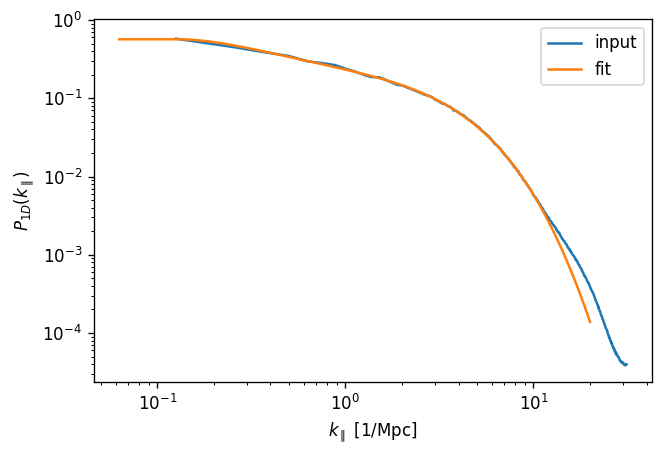

In [14]:
k_fine=np.logspace(np.log10(0.5*k_Mpc[1]),np.log10(2*kmax_fit),100)
plt.loglog(k_Mpc,p1d_Mpc,label='input')
plt.loglog(k_fine,smooth_p1d.P_Mpc(k_fine),label='fit')
plt.legend()
plt.xlabel(r'$k_\parallel$ [1/Mpc]')
plt.ylabel(r'$P_{1D}(k_\parallel)$')